In [244]:
import wave
import matplotlib.pyplot as plt
import imp
import scipy.signal as sig
import numpy as np
import struct

import waveinfo
import pitch
import convert

%matplotlib inline

In [266]:
imp.reload(waveinfo)
waveinfo.show_info("data/original/a.wav")

チャンネル数: 2
サンプル幅: 2
サンプリング周波数: 44100
フレーム数: 105408
パラメータ: (2, 2, 44100, 105408, 'NONE', 'not compressed')
長さ（秒）: 2.39020408163


In [192]:
result = sig.correlate([1,4,2,3,3,2], [1,4,2,3,3,2], mode="valid")
result[:]

array([43])

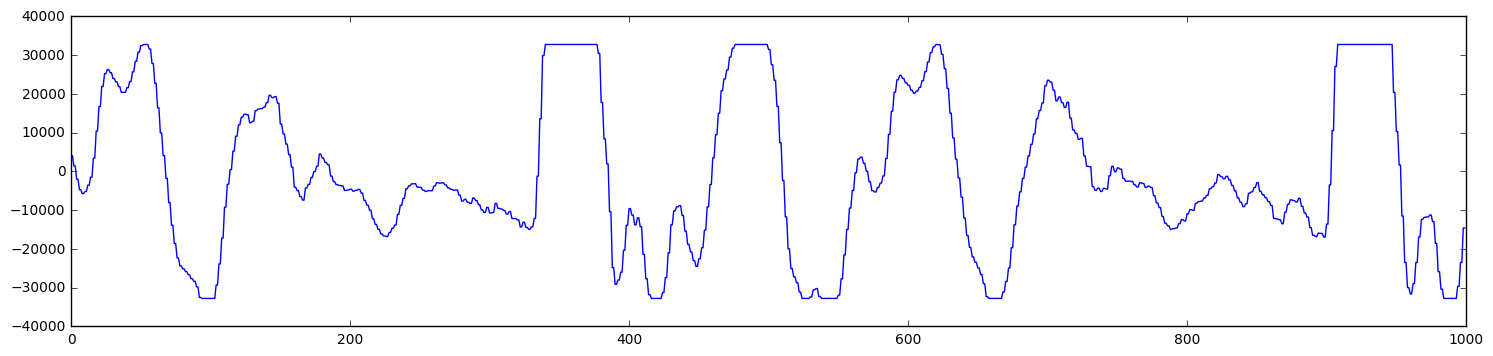

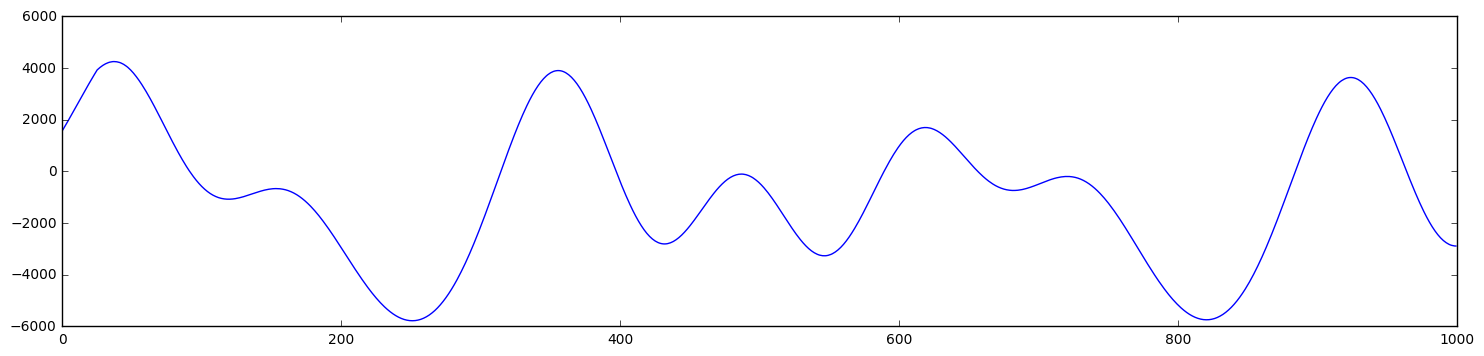

In [250]:
imp.reload(waveinfo)
wavefile = "a2.wav"
waveinfo.show_image(waveinfo.get_data("data/original/"+wavefile))
data = waveinfo.get_smoothed_data("data/original/"+wavefile)
waveinfo.show_image(data)
waveinfo.save_file("data/smoothed/smoothed_"+wavefile, data)

In [187]:
imp.reload(waveinfo)
imp.reload(pitch)
wavefile = "a2.wav"
data = waveinfo.get_smoothed_data("data/original/"+wavefile)

#pitch.find_first_peak(data)
pitch.find_peaks(data)[0][:10]

array([ 37,  96, 147, 228, 294, 359, 423, 484, 543, 607])

280.891719745


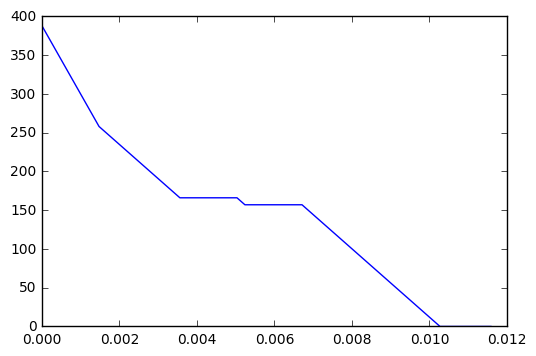

In [256]:
imp.reload(waveinfo)
imp.reload(pitch)
wavefile = "a2.wav"
data = waveinfo.get_smoothed_data("data/original/"+wavefile)

pitch.calc_pitch(data, 44100)

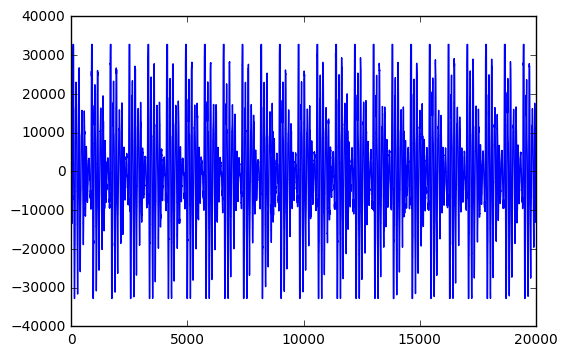

In [264]:
imp.reload(convert)

buf_file = "data/original/a.float"
results = convert.read_float(buf_file)

x = np.arange(len(results))
y = results

plt.plot(x, y)
plt.show()

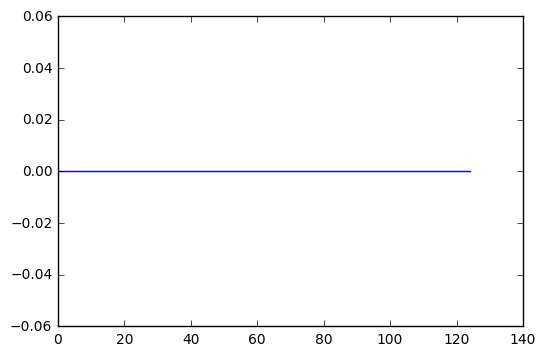

In [265]:
imp.reload(convert)

buf_file = "data/original/a.pitch"
results = convert.read_float(buf_file)

x = np.arange(len(results))
y = results

plt.plot(x, y)
plt.show()